In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [81]:
data = pd.read_csv("../dados-ru/Tabela_1min.csv",
                   parse_dates=['Datetime']
                   # index_col='data' # Quando o cabeçalho for corrigido
                  )
data = data.rename(columns={'Datetime':'data',
                            'Num_pessoas':'num_pessoas',
                            'Refeição':'refeicao',
                            'Carne':'proteina'
                           })

#data = data.set_index("data")
#data.head()

In [82]:
data.head()

,data,num_pessoas,refeicao,proteina
0,2019-03-01 06:46:00,5,Café da Manhã,NaN
1,2019-03-01 06:47:00,10,Café da Manhã,NaN
2,2019-03-01 06:49:00,4,Café da Manhã,NaN
3,2019-03-01 06:50:00,5,Café da Manhã,NaN
4,2019-03-01 06:51:00,3,Café da Manhã,NaN


In [130]:
dias = np.unique(pd.DatetimeIndex(data.data).normalize())
horas = pd.timedelta_range(start="10:30:00", end="14:00:00", freq='T')

In [131]:
dias[0] + horas[0]

Timestamp('2019-03-01 10:30:00')

In [184]:
row_list = []
for dia in dias:
    row_dict = {}
    for hora in horas:
        x = data[data.data == dia + hora]
        if len(x) == 0:
            row_dict[hora] = 0
        else:
            row_dict[hora] = x.num_pessoas.values[0]
    row_list.append(row_dict)
data_hora_por_dia = pd.DataFrame(row_list, index=dias)

In [185]:
data_hora_por_dia

,10:30:00,10:31:00,10:32:00,10:33:00,10:34:00,10:35:00,10:36:00,10:37:00,10:38:00,10:39:00,...,13:51:00,13:52:00,13:53:00,13:54:00,13:55:00,13:56:00,13:57:00,13:58:00,13:59:00,14:00:00
2019-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-03-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-03-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-03-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-03-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-06-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-06-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-06-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


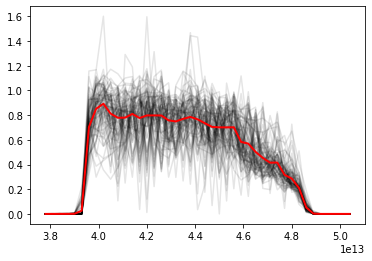

In [229]:
for row in range(0, len(data_hora_por_dia)):
    v = data_hora_por_dia.iloc[row,:]
    v = pd.Series(v) / sum(v) * 100
    #v = v.rolling(5, center=True).sum()
    v = v.resample("5T").mean()
    plt.plot(v, alpha=0.1, color='black')
v = data_hora_por_dia.mean()
v = pd.Series(v) / sum(v) * 100
v = v.resample("5T").mean()
plt.plot(v, color='red', linewidth=2)

## Agregando